In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import os
import nilearn
from nilearn import masking
from nilearn import plotting
from nilearn import image
from scipy import stats

In [3]:
df = pd.read_csv('df_for_RF.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Subject_ID,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [4]:
df_wave = pd.read_csv('finalfinal.csv')
#df_wave.drop('Unnamed: 0', axis=1, inplace=True)
df_wave.head()

,Subject_ID,imaging waves,snr_total,cpadhd_raw,z-score_cpadhd,t-score_cpadhd,conners_adhd_dich,sws_rw,sws_rs,sws_ms,...,zReHo_17Networks_RH_DorsAttnB_TempOcc_1,zReHo_17Networks_RH_DorsAttnA_SPL_8,zReHo_17Networks_RH_DorsAttnA_SPL_7,zReHo_17Networks_RH_DorsAttnA_SPL_6,zReHo_17Networks_RH_DorsAttnA_SPL_5,zReHo_17Networks_RH_DorsAttnA_SPL_4,zReHo_17Networks_RH_DorsAttnA_SPL_3,zReHo_17Networks_RH_DorsAttnA_SPL_2,zReHo_17Networks_RH_DorsAttnA_SPL_1,zReHo_17Networks_RH_DorsAttnA_ParOcc_3
0,sub-0015,ses-wave3,11.837327,0,-1.388889,36.111112,0,3.4,1.666667,1.833333,...,0.670098,0.428403,0.606164,0.367194,0.340738,0.339185,0.632937,0.484317,0.878408,0.776844
1,sub-0085,ses-wave2,11.131926,0,-1.388889,36.111112,0,2.8,2.166667,3.500000,...,0.799444,0.410584,0.882690,1.497676,1.595270,1.006997,1.272547,0.551014,1.482868,1.110642
2,sub-0134,ses-wave3,10.562882,0,-0.866667,41.333334,0,3.8,2.000000,2.166667,...,0.826863,-0.042615,0.413310,0.882732,0.427876,0.378849,0.510567,0.323151,0.741446,0.395507
3,sub-0152,ses-wave2,12.745413,2,-0.200000,48.000000,0,4.0,1.666667,1.500000,...,-0.160882,-0.084407,-0.048464,0.120764,0.165466,-0.156583,-0.357383,-0.159408,0.082269,0.183071
4,sub-0260,ses-wave2,11.458236,14,3.800000,88.000000,1,3.8,2.500000,3.600000,...,0.427443,0.354036,0.827683,0.654600,0.824818,0.137409,0.387290,0.171799,0.892404,0.532177


In [5]:
#df_wave['Subject_ID'].loc[0]
#df['Subject_ID'].loc[0]

In [6]:
df.insert(1, 'age', 'NaN')

In [7]:
df.head()

,Subject_ID,age,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,NaN,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,NaN,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,NaN,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,NaN,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,NaN,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [8]:
j=0
for i, sub in enumerate(df_wave['Subject_ID']):
    for subb in df['Subject_ID']:
        if sub == subb:
            if df_wave['imaging waves'].loc[i] == 'ses-wave2':
                df['age'].loc[i] = 0
            elif df_wave['imaging waves'].loc[i] == 'ses-wave3':
                df['age'].loc[i] = 1

/home/tara/Programming/env/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df['age'][df['Subject_ID']== 'sub-0856'] = 0

<ipython-input-9-cdb64e2d9b6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][df['Subject_ID']== 'sub-0856'] = 0


In [10]:
df.head()

,Subject_ID,age,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,1,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,1,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,0,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [11]:
df.to_csv('df_for_ttest.csv')

In [28]:
df_adhd = df[df['diagadhd']==1]
df_adhd.shape

(46, 188)

In [29]:
df_cn = df[df['diagadhd']==0]
df_cn.shape

(71, 188)

# k-square on gender

In [88]:
#df.insert(1, 'diag', 'Nan')

In [89]:
df.head()

,Subject_ID,diag,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,Nan,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,Nan,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,Nan,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,Nan,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,Nan,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [144]:
df["diagadhd"].replace({0: "control", 1: "ADHD"}, inplace=True)

In [145]:
df.head()

,Subject_ID,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,control,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,control,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,control,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,control,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,ADHD,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


<AxesSubplot:xlabel='diagadhd', ylabel='CHILDgender'>

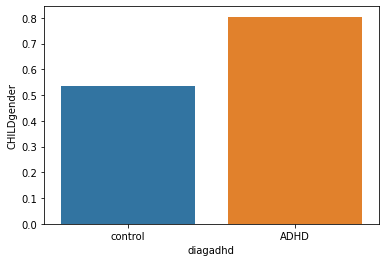

In [148]:
import seaborn as sns
sns.barplot(x='diagadhd', y='CHILDgender', data=df, ci=None)     

#### => the plot means that about 80% of ADHD are boys and about55% ofcontrols are boys

In [35]:
#dd = df_cn[df_cn['CHILDgender'] == 1]
#dd.shape

In [56]:
df = pd.read_csv('chi-squared.csv')
#df = df.set_index('status')
df.head()

,Survived,0,1,Total
0,Sex,NaN,NaN,NaN
1,0,33.0,9.0,42.0
2,1,38.0,37.0,75.0
3,Total,71.0,46.0,117.0


In [55]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f

In [ ]:
chi_score, degree_f = chi2_by_hand(df,'Sex','Survived')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

In [46]:
from scipy.stats import chi2_contingency

# defining the table
#data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(df)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 0.005657587184519726
Dependent (reject H0)


In [47]:
print(dof)

1


In [ ]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [21]:
t1 = df_adhd['CHILDgender']
t2 = df_cn['CHILDgender']

In [22]:
t_value,p_value=stats.ttest_ind(t1,t2)

In [23]:
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

Test statistic is 3.055818


In [24]:
print('p-value for two tailed test is %f'%p_value)

p-value for two tailed test is 0.002791


In [25]:
alpha = 0.05

if p_value<=alpha:
    print('we conclude that the difference between boys and girls is significant')
elif p_value>alpha:
    print('we conclude that the difference between boys and girls is not significant')

we conclude that the difference between boys and girls is significant


# age

In [50]:
t1 = df_adhd['age']
t2 = df_cn['age']

In [54]:
df["age"] = pd.to_numeric(df["age"])

In [55]:
df["age"]

0      13.0
1      11.5
2      13.0
3      11.5
4      11.5
       ... 
112    11.5
113    11.5
114    11.5
115    11.5
116    11.5
Name: age, Length: 117, dtype: float64

In [53]:
#df_adhd['CHILDgender']

4      1
6      1
9      1
16     1
17     1
22     1
23     1
27     1
30     1
31     0
38     1
43     1
46     1
55     1
58     1
59     1
61     1
62     0
64     0
66     1
69     0
70     1
75     1
76     1
77     1
78     1
80     1
82     1
84     1
85     1
86     0
90     1
92     0
93     0
94     0
95     1
96     1
97     1
99     1
102    1
104    1
108    1
110    1
112    1
115    0
116    1
Name: CHILDgender, dtype: int64

In [52]:
t_value,p_value=stats.ttest_ind(t1,t2)

TypeError: can only concatenate str (not "float") to str

In [ ]:
df['age'].iloc[[17]]

In [ ]:
df['age'].values

In [ ]:
df[df['age']=='0']

In [11]:
df_wave[df_wave['Subject_ID']== 'sub-0856']

,Subject_ID,imaging waves,snr_total,cpadhd_raw,z-score_cpadhd,t-score_cpadhd,conners_adhd_dich,sws_rw,sws_rs,sws_ms,...,zReHo_17Networks_RH_DorsAttnB_TempOcc_1,zReHo_17Networks_RH_DorsAttnA_SPL_8,zReHo_17Networks_RH_DorsAttnA_SPL_7,zReHo_17Networks_RH_DorsAttnA_SPL_6,zReHo_17Networks_RH_DorsAttnA_SPL_5,zReHo_17Networks_RH_DorsAttnA_SPL_4,zReHo_17Networks_RH_DorsAttnA_SPL_3,zReHo_17Networks_RH_DorsAttnA_SPL_2,zReHo_17Networks_RH_DorsAttnA_SPL_1,zReHo_17Networks_RH_DorsAttnA_ParOcc_3
17,sub-0856,ses-wave2,11.839517,16,4.466667,94.666667,1,3.0,2.833333,3.0,...,1.432148,1.594856,0.880394,0.780194,2.015546,1.05233,1.37248,0.639157,1.491111,1.242057


In [12]:
df[df['Subject_ID']== 'sub-0856']

,Subject_ID,age,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
16,sub-0856,NaN,1,1,-0.157126,0.110511,-0.65897,-0.606422,-0.697269,-0.465275,...,0.39759,-0.380469,-0.097885,-0.011879,0.061109,-0.12133,-0.012883,-0.063305,-0.196291,-0.203779


In [15]:
df['age'][df['Subject_ID']== 'sub-0856'] = 11.5

<ipython-input-15-da0a261ede8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][df['Subject_ID']== 'sub-0856'] = 11.5


In [16]:
df[df['Subject_ID']== 'sub-0856']

,Subject_ID,age,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
16,sub-0856,11.5,1,1,-0.157126,0.110511,-0.65897,-0.606422,-0.697269,-0.465275,...,0.39759,-0.380469,-0.097885,-0.011879,0.061109,-0.12133,-0.012883,-0.063305,-0.196291,-0.203779
